## Lab3 Machine Learning Balumatkina DA-01

### Завдання:
1. Прочитати опис та викачати дані з Kaggle змагання https://www.kaggle.com/c/titanic/data.
2. Обробити дані для подальшого використання у кластеризації (Unsupervised Learning) - вирішити проблему пропущених значень, закодувати не цифрові змінні.
3. Провести кластеризацію даних за допомогою алгоритмів кластеризації з різними параметрами.
4. Візуалізувати та оформити дані.

В даній лабораторній роботі спробуємо для Unsupervised Learning використати два алгоритми кластеризації, які точно працюватимуть: K-means Clustering та Agglomerative Hierarchial Clustering, а також один експериментальний - DBSCAN Clustering.

## K-means Clustering:
Основна ідея даного алгоритму полягає в розподілі отриманої кількості записів в просторі даних на k попередньо визначених кластерів. Алгоритм намагається знайти такий розподіл, що буде мінімізувати суму квадратів відстаней між об'єктами та центрами їх кластерів.
### Недоліки:
- Необхідно попреденьо знати кількість кластерів;
- Якщо дані дуже близько розташовані, кластери просто перемішаються;
- Не працює з категоріальними даними;
- Не вивозить outlayers.
### Переваги:
- Простий до розуміння, легкий до дебагу алгоритм;
- Порівняно швидкий у виконанні.

## Agglomerative Hierarchial Clustering:
Основна ідея - на кожному кроці два найближчі кластери об'єднуються в один кластер, і цей процес триває допоки всі об'єкти не будуть об'єднані в один великий кластер або поки не буде досягнуто якогось критерію зупинки (route from bottom to top).
### Недоліки:
- Довго виконується;
- Не завжди робить те, чого від алгоритму хоче розробник;
- Конкретна математична функція для оптимізації просто відсутня;
- Інколи складно оцінити кількість кластерів по дендрограмі, яка, до того ж, може займати багато часу на будування.
### Переваги:
- Не потрібно передчасно знати кількість кластерів;
- Легкий до розуміння та реалізації.

## DBSCAN Clustering:
Коротко - алгоритм проходиться по точках-записах в рамках наданої бази даних та вирішує, чи розміщувати сусідні точки в один і той самий кластер.
### Недоліки:
- Не працює у випадку, якщо кластери мають різну густину;
- Не працює, якщо набір даних має neck-подібну структуру.
### Переваги:
- Не потрібно передчасно знати кількість кластерів;
- Здатен відсіювати шум;
- Не припускає, що кластери розподілені по якомусь закону.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print(f"TRAIN data file analyze {train_df.shape}")

TRAIN data file analyze (891, 12)


In [3]:
print(f"TEST data file analyze {test_df.shape}")

TEST data file analyze (418, 11)


За аналізом отриманих файлів одразу бачимо, що в тестовому наборі відсутня одна з колонок-властивостей. З'ясуємо, яка, а також визначимо, які властивості можуть бути не надто важливими для кластеризації (якщо такі присутні), внаслідок чого їх можна буде видалити.

In [4]:
print("TRAIN data file")
train_df.head(10)

TRAIN data file


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
print("TEST data file")
test_df.head(10)

TEST data file


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


Таким чином, в тестовому файлі відсутня колонка "Survived", результати якої й потрібно передбачати кластеризацією, тобто проблеми з відсутньою властивістю все ж таки немає.

In [6]:
train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [7]:
print("TRAIN data file")
train_df.head()

TRAIN data file


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
print("TEST data file")
test_df.head()

TEST data file


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [9]:
print("TRAIN data file empty values")
print(train_df.isnull().sum())

TRAIN data file empty values
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [10]:
print("TEST data file empty values")
print(test_df.isnull().sum())

TEST data file empty values
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


Отож, в наборі даних для тренування потрібно вирішити проблему з відсутніми значеннями в фічах Age та Embarked, а в тестовому наборі - з Age та Fare. Не будемо видаляти записи, оскільки і без того скоротили наші набори даних методом видалення стовпців певних особливостей, а заповнимо відсутні значення середнім по фічі, оскільки в інших записах існує достатня кількість значень.

In [11]:
#TRAIN fill
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

print("TRAIN data file empty values")
print(train_df.isnull().sum())

TRAIN data file empty values
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [12]:
#TEST fill
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

print("TEST data file empty values")
print(test_df.isnull().sum())

TEST data file empty values
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


Кодування значень.
Ми вже не раз бачили вигляд обох наборів даних з Титаніку та так само бачили, що лише дві фічі мають не числові значення:
Sex має два варіанти - female та male
Embarked має на один варіант більше - C, Q, S
В цілому можемо використати одноразове (one-hot) кодування для обох властивостей

In [13]:
#TRAIN data encoding
train_df= pd.get_dummies(train_df, columns=['Sex'])
train_df = pd.get_dummies(train_df, columns=['Embarked'])

In [14]:
print("TRAIN data file")
train_df.head()

TRAIN data file


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


In [15]:
#TEST data encoding
test_df= pd.get_dummies(test_df, columns=['Sex'])
test_df = pd.get_dummies(test_df, columns=['Embarked'])

In [16]:
print("TEST data file")
test_df.head()

TEST data file


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,False,True,False,True,False
1,3,47.0,1,0,7.0000,True,False,False,False,True
2,2,62.0,0,0,9.6875,False,True,False,True,False
3,3,27.0,0,0,8.6625,False,True,False,False,True
4,3,22.0,1,1,12.2875,True,False,False,False,True


Далі при кластеризації даних буде використовуватись спеціальний коефіцієнт - silhouette score. Він надає вимір кожного об'єкту у кластеризованому наборі даних, враховуючи як схожіть об'єкта з об'єктами власного кластеру, так і схожість з об'єктами інших кластерів. Високе значення коефіцієнту сигналізує про те, що об'єкт розташований добре в своєму кластері та досить далеко від об'єктів сусідніх кластерів. Мінусове значення краще не зустрічати, оскільки це означає, що об'єкт було помилково призначено в неправильний кластер.

In [17]:
def cluster_data(data, algorithm, n_clusters):
    if algorithm == 'kmeans':
        cluster_algorithm = KMeans(n_clusters=n_clusters, random_state=42)
    elif algorithm == 'agglomer':
        cluster_algorithm = AgglomerativeClustering(n_clusters=n_clusters)
    else:
        raise ValueError('pick the right algorithm')

    cluster_algorithm.fit(data)
    cluster_labels = cluster_algorithm.labels_

    silh_score = silhouette_score(data, cluster_labels, metric='euclidean')
    print(f"silhouette score: {silh_score:.5f}")
    print(f"the algorithm: {algorithm}")
    print(f"clusters amount: {n_clusters}")

    return cluster_labels

silhouette score: 0.79127

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



the algorithm: kmeans
clusters amount: 2


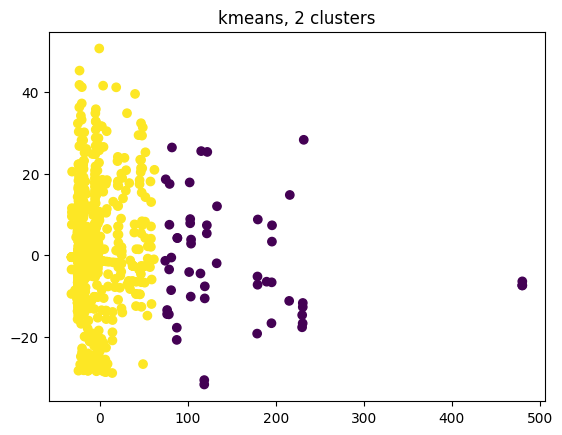

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


silhouette score: 0.66184
the algorithm: kmeans
clusters amount: 3


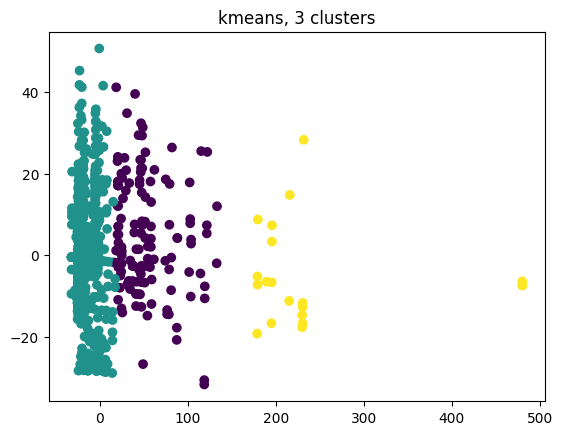

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


silhouette score: 0.63542
the algorithm: kmeans
clusters amount: 4


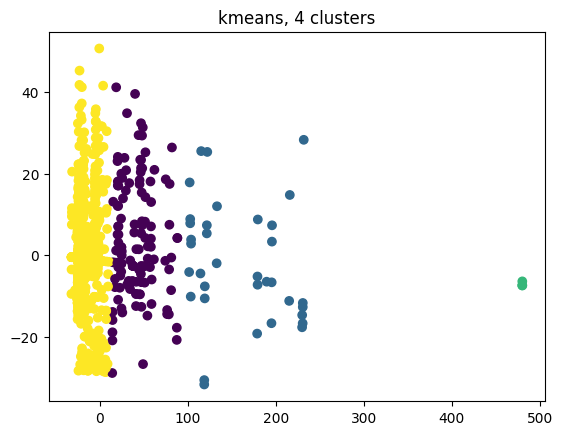

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


silhouette score: 0.61470
the algorithm: kmeans
clusters amount: 5


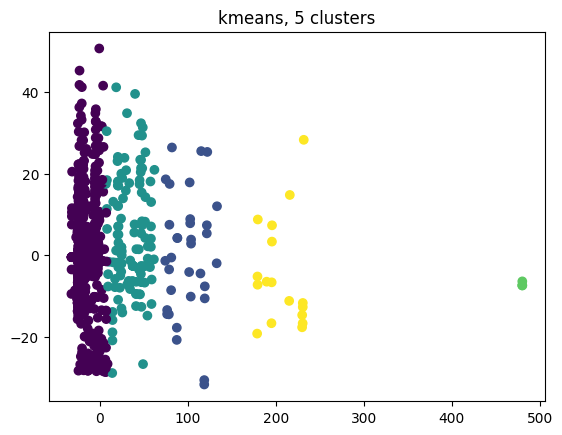

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


silhouette score: 0.44858
the algorithm: kmeans
clusters amount: 6


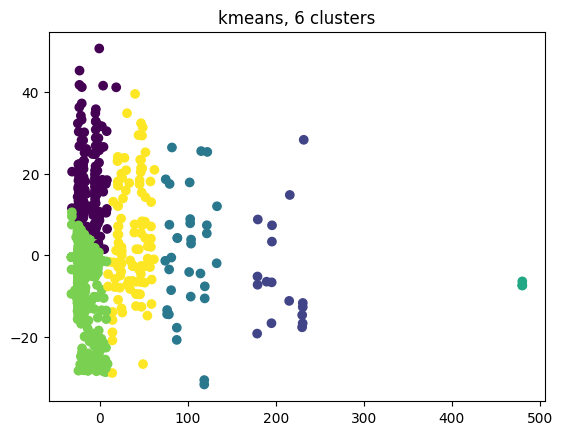

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


silhouette score: 0.47849
the algorithm: kmeans
clusters amount: 7


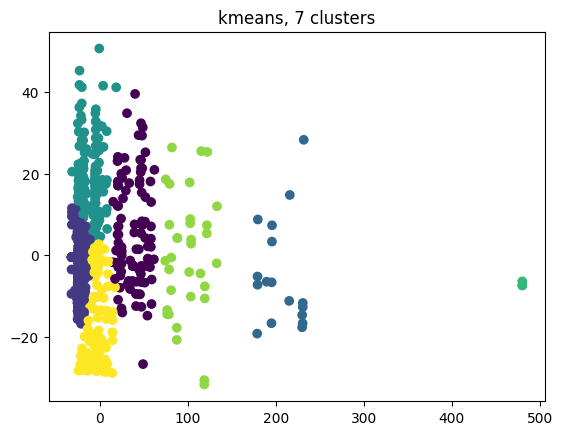

In [18]:
pca = PCA(n_components=2)
train_pca = pca.fit_transform(train_df)

for n_clusters in range(2, 8):
    kmeans_labels = cluster_data(train_df, algorithm='kmeans', n_clusters=n_clusters)
    plt.scatter(train_pca[:, 0], train_pca[:, 1], c=kmeans_labels)
    plt.title(f"kmeans, {n_clusters} clusters")
    plt.show()

silhouette score: 0.84657
the algorithm: agglomer
clusters amount: 2


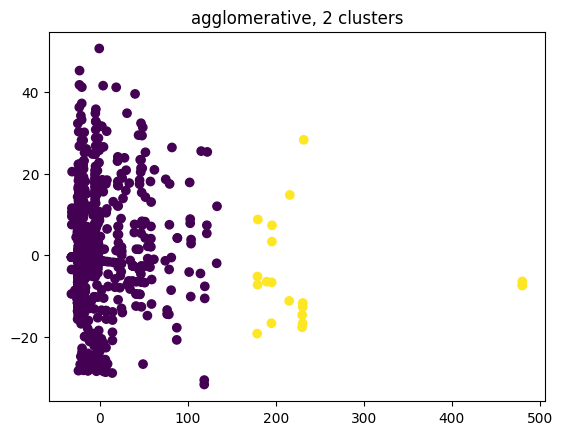

silhouette score: 0.65651
the algorithm: agglomer
clusters amount: 3


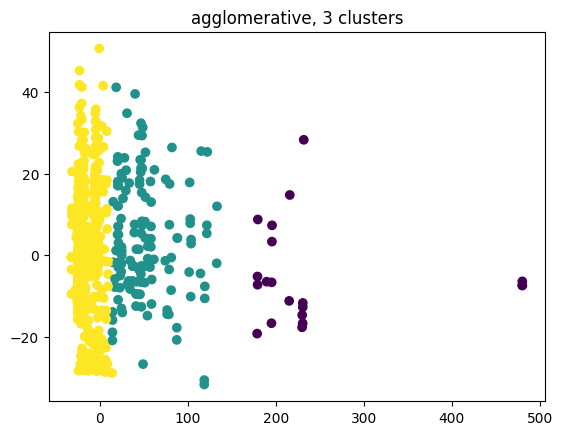

silhouette score: 0.65909
the algorithm: agglomer
clusters amount: 4


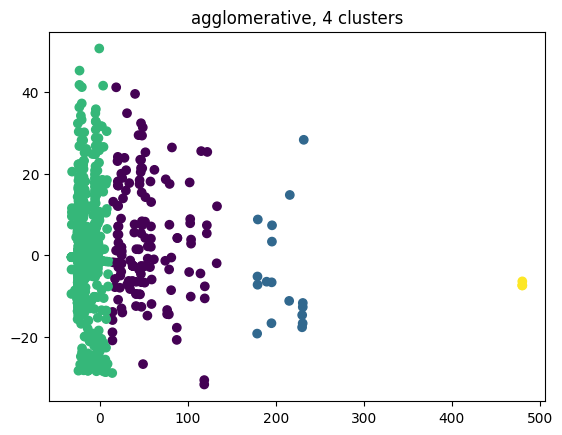

silhouette score: 0.62137
the algorithm: agglomer
clusters amount: 5


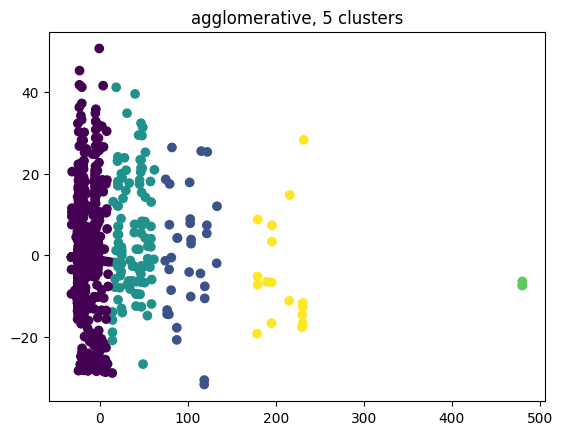

silhouette score: 0.42285
the algorithm: agglomer
clusters amount: 6


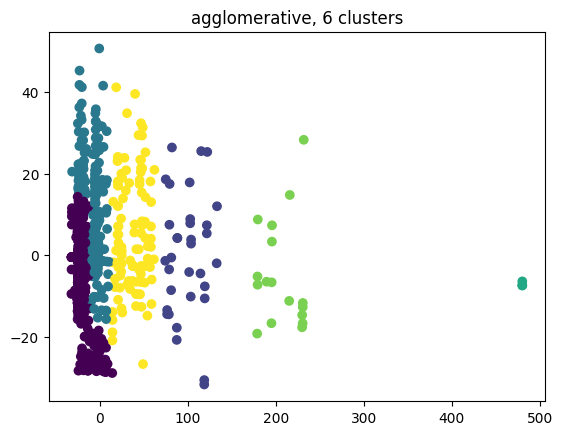

silhouette score: 0.46432
the algorithm: agglomer
clusters amount: 7


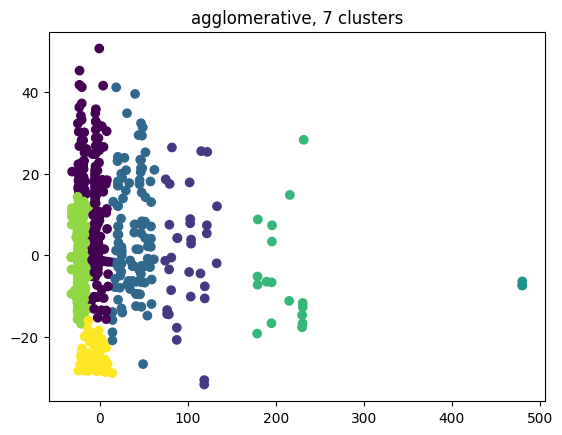

In [19]:
for n_clusters in range(2, 8):
    agglomer_labels = cluster_data(train_df, algorithm='agglomer', n_clusters=n_clusters)
    plt.scatter(train_pca[:, 0], train_pca[:, 1], c=agglomer_labels)
    plt.title(f"agglomerative, {n_clusters} clusters")
    plt.show()

Тепер експериментально спробуємо використати DBSCAN кластеризацію.

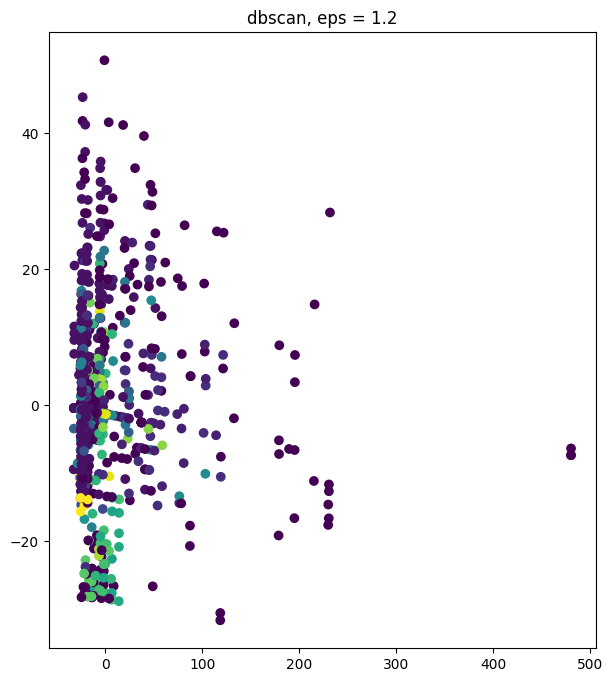

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_df)

dbscan = DBSCAN(eps=1.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(train_scaled)

plt.figure(figsize=(24,8))
plt.subplot(1,3,3)
plt.scatter(train_pca[:, 0], train_pca[:, 1], c=dbscan_labels)
plt.title('dbscan, eps = 1.2')
plt.show()